In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

assets_list = ["MUTANDIS", "ADDOHA", "MED_PAPER", "RISMA", "TGCC",  "CDM", "IMMORENTE", "DAR_SAADA", "ARADEI_CAPITAL" ]
df_list = {}
for asset in assets_list:
    df_list[asset] = pd.read_excel(f"{asset}.xlsx")
    df_list[asset]["Séance"] = pd.to_datetime(df_list[asset]["Séance"],dayfirst=True)
    df_list[asset] = df_list[asset].set_index("Séance")

In [139]:
# check the data
df_list["MUTANDIS"]

,Instrument,Ticker,Ouverture,Dernier Cours,+haut du jour,+bas du jour,Nombre de titres échangés,Volume des échanges,Nombre de contrats,Capitalisation,Cours ajusté
Séance,,,,,,,,,,,
2024-11-15,MUTANDIS SCA,MUT,301.95,298.5,301.95,298.50,21048.0,6313840.65,26.0,2.760151e+09,298.5
2024-11-14,MUTANDIS SCA,MUT,300.00,300.0,300.00,299.95,13295.0,3988495.50,19.0,2.774021e+09,300.0
2024-11-13,MUTANDIS SCA,MUT,301.95,301.0,304.90,296.55,3704.0,1110424.70,26.0,2.783268e+09,301.0
2024-11-12,MUTANDIS SCA,MUT,300.00,298.0,302.00,298.00,12819.0,3843817.05,51.0,2.755528e+09,298.0
2024-11-11,MUTANDIS SCA,MUT,300.00,298.0,302.80,290.00,7096.0,2105450.80,116.0,2.755528e+09,298.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,MUTANDIS SCA,MUT,248.00,248.0,249.00,248.00,13712.0,3400606.00,10.0,1.983191e+09,248.0
2021-11-24,MUTANDIS SCA,MUT,248.00,249.0,249.00,248.00,319.0,79130.00,10.0,1.991188e+09,249.0
2021-11-23,MUTANDIS SCA,MUT,246.00,248.0,248.00,245.55,89.0,21925.90,8.0,1.983191e+09,248.0


In [140]:
assets_list

['MUTANDIS',
 'ADDOHA',
 'MED_PAPER',
 'RISMA',
 'TGCC',
 'CDM',
 'IMMORENTE',
 'DAR_SAADA',
 'ARADEI_CAPITAL']

In [141]:
# Remove duplicate elements
duplcated_data = df_list[asset].index.duplicated(keep="last")
df_list[asset] = df_list[asset][~duplcated_data]

In [142]:
# check information about data
df_list["MUTANDIS"].describe()

,Ouverture,Dernier Cours,+haut du jour,+bas du jour,Nombre de titres échangés,Volume des échanges,Nombre de contrats,Capitalisation,Cours ajusté
count,749.000000,749.000000,749.000000,749.000000,749.000000,7.490000e+02,748.000000,7.490000e+02,749.000000
mean,242.823231,243.090654,244.735047,240.819426,9227.152203,2.289923e+06,29.779412,2.222553e+09,243.090654
std,27.182925,25.937955,27.435991,26.977592,17855.409713,4.472337e+06,30.912551,2.497574e+08,25.937955
min,0.000000,190.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.756880e+09,190.000000
25%,222.000000,221.000000,223.950000,220.000000,661.000000,1.592750e+05,12.750000,1.991188e+09,221.000000
50%,242.050000,242.000000,244.000000,240.200000,2585.000000,6.405950e+05,21.000000,2.209970e+09,242.000000
75%,262.000000,262.000000,264.950000,260.250000,9581.000000,2.297026e+06,35.000000,2.415710e+09,262.000000
max,314.000000,313.000000,317.000000,310.000000,160325.000000,4.118650e+07,313.000000,2.894229e+09,313.000000


In [143]:
# Create a DataFrame to aggregate all the stocks into a database with closing price data
df = pd.DataFrame()

for asset in df_list:
    df[asset] = df_list[asset]["Dernier Cours"]
    print(asset)

MUTANDIS
ADDOHA
MED_PAPER
RISMA
TGCC
CDM
IMMORENTE
DAR_SAADA
ARADEI_CAPITAL


In [144]:
df

,MUTANDIS,ADDOHA,MED_PAPER,RISMA,TGCC,CDM,IMMORENTE,DAR_SAADA,ARADEI_CAPITAL
Séance,,,,,,,,,
2024-11-15,298.5,36.20,20.50,208.00,484.0,1025.0,90.50,74.51,504.0
2024-11-14,300.0,35.49,20.66,208.00,471.8,1000.0,90.50,74.00,499.0
2024-11-13,301.0,35.35,20.40,209.55,465.2,997.4,90.35,75.00,494.5
2024-11-12,298.0,36.00,20.67,210.00,458.0,1020.0,90.94,75.00,495.0
2024-11-11,298.0,36.75,20.10,212.05,455.2,1046.0,90.50,75.02,493.5
...,...,...,...,...,...,...,...,...,...
2021-11-25,248.0,10.68,33.19,110.95,NaN,590.2,100.00,30.99,405.0
2021-11-24,249.0,10.67,31.99,111.00,NaN,590.2,100.60,30.75,405.0
2021-11-23,248.0,10.70,31.34,110.00,NaN,590.2,102.00,31.50,408.0


In [145]:
# We notice NaN (null) data for the TGCC asset because its data starts from 16-12-2021, and we organize the data in ascending order by date
data = df.loc["2021-12-16":]
data.sort_index(ascending=True, inplace=True)

In [146]:
data

,MUTANDIS,ADDOHA,MED_PAPER,RISMA,TGCC,CDM,IMMORENTE,DAR_SAADA,ARADEI_CAPITAL
Séance,,,,,,,,,
2021-12-16,242.00,10.69,25.00,107.00,149.55,585.0,103.90,29.00,409.9
2021-12-17,241.00,10.70,24.99,107.80,164.50,595.0,103.00,28.60,409.0
2021-12-20,245.95,10.70,25.00,105.50,165.50,595.0,101.00,28.60,409.0
2021-12-21,243.95,10.55,25.35,109.00,163.05,601.0,103.00,29.00,401.0
2021-12-22,244.90,10.70,23.83,109.00,168.05,601.0,103.00,29.21,405.0
...,...,...,...,...,...,...,...,...,...
2024-11-11,298.00,36.75,20.10,212.05,455.20,1046.0,90.50,75.02,493.5
2024-11-12,298.00,36.00,20.67,210.00,458.00,1020.0,90.94,75.00,495.0
2024-11-13,301.00,35.35,20.40,209.55,465.20,997.4,90.35,75.00,494.5


In [147]:
data.describe()

,MUTANDIS,ADDOHA,MED_PAPER,RISMA,TGCC,CDM,IMMORENTE,DAR_SAADA,ARADEI_CAPITAL
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,243.061438,14.689425,23.663055,166.921603,195.169315,735.084795,98.888411,33.467767,457.994726
std,26.268140,9.680661,3.402324,54.346778,86.444710,118.567127,5.838672,23.453334,34.650636
min,190.000000,5.500000,18.500000,97.000000,110.000000,510.000000,90.030000,10.000000,385.000000
25%,220.000000,7.580000,20.677500,115.850000,135.237500,625.000000,94.892500,19.000000,436.000000
50%,241.750000,10.300000,23.790000,150.025000,160.000000,712.500000,97.000000,24.290000,449.950000
75%,262.037500,16.787500,25.900000,221.887500,233.000000,840.000000,104.000000,31.222500,490.000000
max,313.000000,39.300000,33.870000,264.100000,484.000000,1046.000000,115.000000,100.000000,552.000000


In [148]:
# Check if there is a correlation between the assets
corr_data = data.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

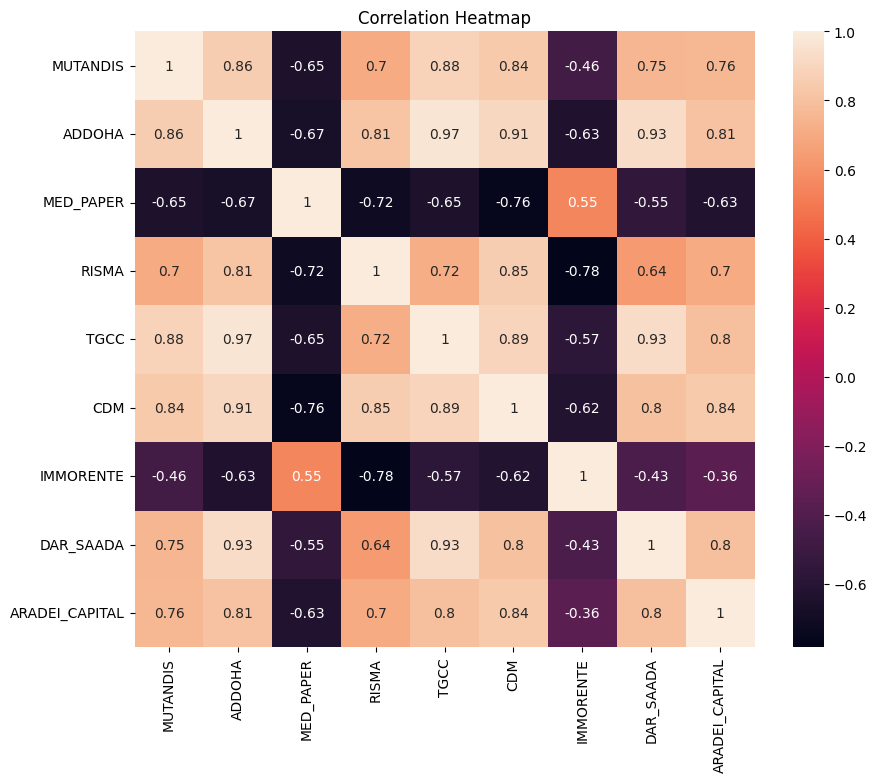

In [149]:
# After observing the heatmap, no significant correlation between the indices is noticeable
plt.figure(figsize=(10,8))
sns.heatmap(corr_data, annot=True)
plt.title('Correlation Heatmap')

In [150]:
# Calculate the price changes using the pct_change() function
data_evol = data.pct_change()
data_evol

,MUTANDIS,ADDOHA,MED_PAPER,RISMA,TGCC,CDM,IMMORENTE,DAR_SAADA,ARADEI_CAPITAL
Séance,,,,,,,,,
2021-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-17,-0.004132,0.000935,-0.000400,0.007477,0.099967,0.017094,-0.008662,-0.013793,-0.002196
2021-12-20,0.020539,0.000000,0.000400,-0.021336,0.006079,0.000000,-0.019417,0.000000,0.000000
2021-12-21,-0.008132,-0.014019,0.014000,0.033175,-0.014804,0.010084,0.019802,0.013986,-0.019560
2021-12-22,0.003894,0.014218,-0.059961,0.000000,0.030665,0.000000,0.000000,0.007241,0.009975
...,...,...,...,...,...,...,...,...,...
2024-11-11,-0.038865,-0.006757,-0.014223,-0.009112,0.000659,0.015534,-0.002975,-0.012895,-0.013000
2024-11-12,0.000000,-0.020408,0.028358,-0.009668,0.006151,-0.024857,0.004862,-0.000267,0.003040
2024-11-13,0.010067,-0.018056,-0.013062,-0.002143,0.015721,-0.022157,-0.006488,0.000000,-0.001010


In [151]:
data_evol_corr = data_evol.corr()

Text(0.5, 1.0, 'Correlation Heatmap')

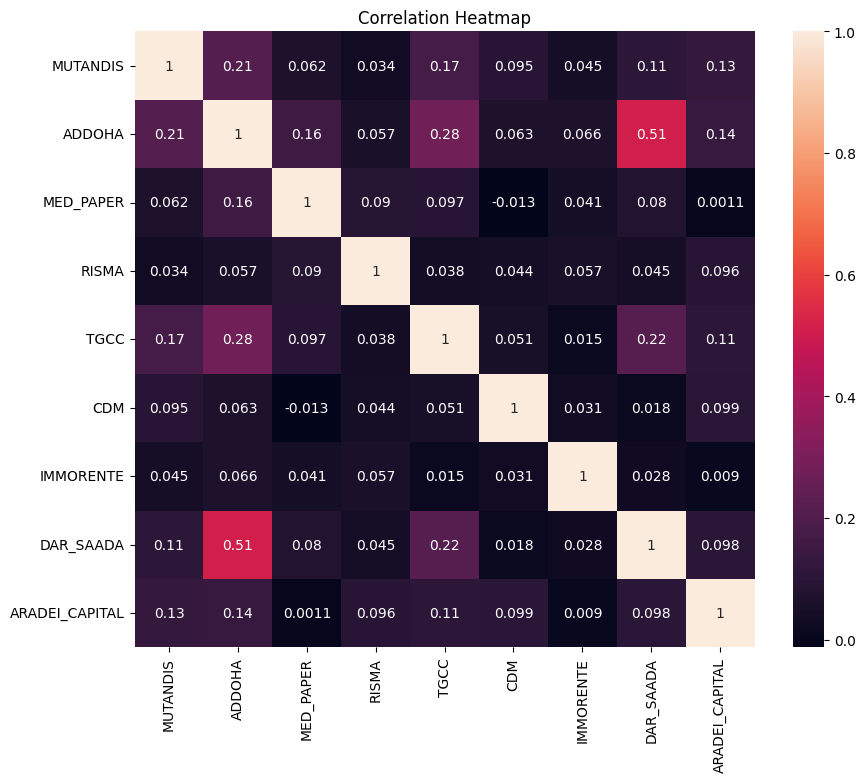

In [152]:
# Check if there is a correlation between the price changes of the assets
plt.figure(figsize=(10,8))
sns.heatmap(data_evol_corr, annot=True)
plt.title('Correlation Heatmap')
# It is evident that the two correlated indices are ADDOHA and DAR_SAADA, which belong to real estate companies

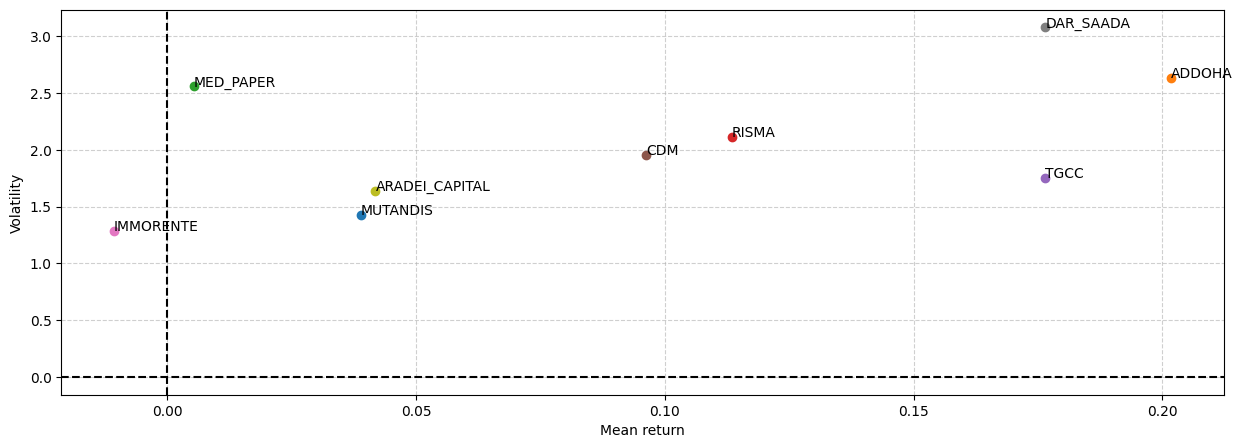

In [153]:
# Calculate the risk-return pair (volatility and return) and present it in a graph

# List of returns
mean_return_list = []

# List of volatilities
volatility_list = []

# Temporal data
temp_data = data_evol.loc[:]

# Create the graph

fig, ax=plt.subplots(figsize=(15,5))

for col in temp_data.columns:
    mean_return = temp_data[col].mean()*100
    volatility = temp_data[col].std()*100
    mean_return_list.append(mean_return)
    volatility_list.append(volatility)
    
    ax.text(mean_return,volatility,col)
    ax.scatter(mean_return,volatility,label=col)

ax.grid(True,linestyle='--',alpha=0.6)
ax.axvline(0,color='black',linestyle='--')
ax.axhline(0,color='black',linestyle='--')

ax.set_xlabel('Mean return')
ax.set_ylabel('Volatility')

plt.show()

In [154]:
temp_data

,MUTANDIS,ADDOHA,MED_PAPER,RISMA,TGCC,CDM,IMMORENTE,DAR_SAADA,ARADEI_CAPITAL
Séance,,,,,,,,,
2021-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-17,-0.004132,0.000935,-0.000400,0.007477,0.099967,0.017094,-0.008662,-0.013793,-0.002196
2021-12-20,0.020539,0.000000,0.000400,-0.021336,0.006079,0.000000,-0.019417,0.000000,0.000000
2021-12-21,-0.008132,-0.014019,0.014000,0.033175,-0.014804,0.010084,0.019802,0.013986,-0.019560
2021-12-22,0.003894,0.014218,-0.059961,0.000000,0.030665,0.000000,0.000000,0.007241,0.009975
...,...,...,...,...,...,...,...,...,...
2024-11-11,-0.038865,-0.006757,-0.014223,-0.009112,0.000659,0.015534,-0.002975,-0.012895,-0.013000
2024-11-12,0.000000,-0.020408,0.028358,-0.009668,0.006151,-0.024857,0.004862,-0.000267,0.003040
2024-11-13,0.010067,-0.018056,-0.013062,-0.002143,0.015721,-0.022157,-0.006488,0.000000,-0.001010


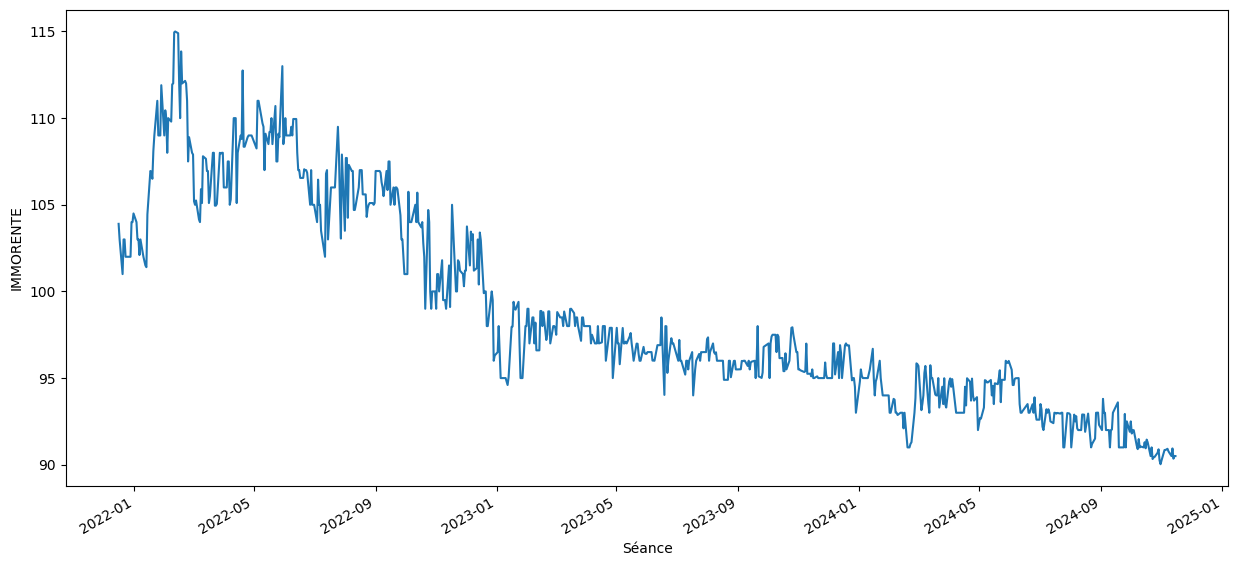

In [155]:
# Check the graph of the IMMORENTE asset, as it shows a negative return
fig, ax= plt.subplots(figsize=(15,7))
data['IMMORENTE'].plot(label='IMMORENTE')
ax.set_ylabel('IMMORENTE')
plt.show()

In [156]:
# Number of trading days per year in the moroccan stock market
len(df["ADDOHA"]["2022"])

254

In [157]:
len(df["ADDOHA"]["2023"])

249

In [158]:
len(df["ADDOHA"]["2024"])

215

In [159]:
# Estimate the average number of trading days per year

(254+249)/2

251.5

In [160]:
data_evol

,MUTANDIS,ADDOHA,MED_PAPER,RISMA,TGCC,CDM,IMMORENTE,DAR_SAADA,ARADEI_CAPITAL
Séance,,,,,,,,,
2021-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-17,-0.004132,0.000935,-0.000400,0.007477,0.099967,0.017094,-0.008662,-0.013793,-0.002196
2021-12-20,0.020539,0.000000,0.000400,-0.021336,0.006079,0.000000,-0.019417,0.000000,0.000000
2021-12-21,-0.008132,-0.014019,0.014000,0.033175,-0.014804,0.010084,0.019802,0.013986,-0.019560
2021-12-22,0.003894,0.014218,-0.059961,0.000000,0.030665,0.000000,0.000000,0.007241,0.009975
...,...,...,...,...,...,...,...,...,...
2024-11-11,-0.038865,-0.006757,-0.014223,-0.009112,0.000659,0.015534,-0.002975,-0.012895,-0.013000
2024-11-12,0.000000,-0.020408,0.028358,-0.009668,0.006151,-0.024857,0.004862,-0.000267,0.003040
2024-11-13,0.010067,-0.018056,-0.013062,-0.002143,0.015721,-0.022157,-0.006488,0.000000,-0.001010


In [161]:
# To calculate the Sharpe Ratio, multiply the square root of the period (in this case, the square root of the average number of trading days between 2022 and 2023 = 251)
# by the mean return (temp_data[col].mean) divided by the mean standard deviation (temp_data[col].std).

sharpe_ratios = []

temp_data = data_evol.loc[:]

for col in temp_data.columns:
    sharpe_ratio = (251**(1/2))*(temp_data[col].mean()/temp_data[col].std())
    sharpe_ratios.append(sharpe_ratio)

df_sharpe = pd.DataFrame(sharpe_ratios, index=temp_data.columns, columns=['Sharpe Ratio'])
df_sharpe = df_sharpe.sort_values(by='Sharpe Ratio')
df_sharpe

# If the result is less than 0, it indicates poor returns
# If it is between 0 and 1, the risks taken are too high compared to the expected returns
# Finally, if it is greater than 1, the expected returns outweigh the risks

,Sharpe Ratio
IMMORENTE,-0.132015
MED_PAPER,0.033013
ARADEI_CAPITAL,0.403625
MUTANDIS,0.432696
CDM,0.779839
RISMA,0.851051
DAR_SAADA,0.908343
ADDOHA,1.215078
TGCC,1.593187


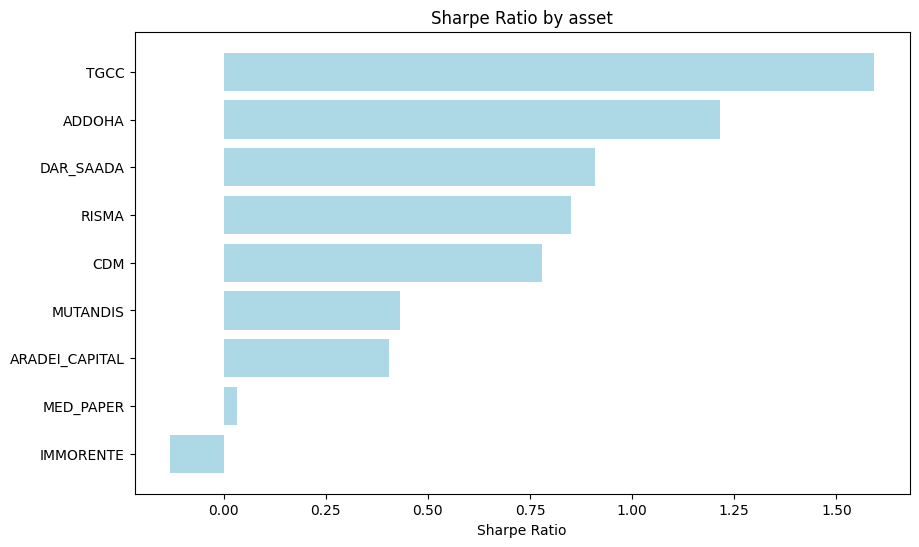

The assets with the best Sharpe Ratio over our period, spanning from 16-12-2021 to today's date,
are: TGCC, ADDOHA et DAR_SAADA


In [162]:
# Present the Sharpe Ratio in a graph
plt.figure(figsize=(10, 6))
plt.barh(df_sharpe.index, df_sharpe['Sharpe Ratio'], color='lightblue')
plt.xlabel('Sharpe Ratio')
plt.title('Sharpe Ratio by asset')
plt.show()
print(f"The assets with the best Sharpe Ratio over our period, spanning from 16-12-2021 to today's date,")
print(f"are: TGCC, ADDOHA et DAR_SAADA")